# STEP 1 Pre-processing and exploring data

### In this section, we are pre-processing and exploring the audio files  that will be fed into our algorithms.

In [35]:
#Uncommented this section if you need to install this package
#pip install librosa
#pip install soundfile

#We strongly recommend to update ffmpeg library too

In [38]:
# Required libraries
import tarfile
import os
import pandas as pd
import numpy as np
import pygame
import random
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [54]:
#This function, called unpacking, is used to unpack all .tar files in a given folder. It takes two arguments: folder_path, which is the path to the folders containing the files, and destination, which is the path to the destination folder where the contents of the .tar files will be extracted.
def unpacking(folder_path, destination):
# list of all files in the folder
    file_list = os.listdir(folder_path)
    #opening all files in the folder
    for file_name in file_list:
        if file_name.endswith('.tar.gz'):
            # Constructing full file path 
            file_path = os.path.join(folder_path, file_name)
            # open file
            with tarfile.open(file_path, 'r:gz') as file:
                # extracting file
                file.extractall(path = destination)
            print("Unpacked " + file_name)
        elif file_name.endswith('.tar'):
            file_path = os.path.join(folder_path, file_name)
            # open file
            with tarfile.open(file_path, 'r:') as file:
                # extracting file
                file.extractall(path = destination)
            print("Unpacked " + file_name)
        else:
            print("Skipping " + file_name + " because not a .tar/.tag.gz file.")

In [55]:
folder_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject"
destination = os.path.join(folder_path, "unpacked")

In [56]:
# Uncommented if you want to unpack the files
#unpacking(folder_path, destination)

In [5]:
analysis_window_length = 0.01  # 10 ms in seconds

In [6]:
# Function to sample mp3 files and analyze the dataset content with and example of a sample rate
def sample_audio(language_mp3_path):
    language_list = os.listdir(language_mp3_path)
    language_dic = {"it" : "Italian",
                   "es" : "Spanish"}

    for language in language_list:

        language_path = os.path.join(language_mp3_path, language)

        # Skip non-directory items
        if not os.path.isdir(language_path):
            continue

        if language in language_dic:
            language_name = language_dic[language]
        else:
            print("Unknown language!")
            language_name = language

        clips_path = os.path.join(language_path, "clips")
        # get a list of all files in the folder
        mp3_list = os.listdir(clips_path)
        # choose a random file from the list
        random_file = random.choice(mp3_list)
        # Play random file 
        print("Playing a random file in the following language " + language_name)
        print(random_file)
        mp3_path = os.path.join(clips_path, random_file)


        # Numerical presentation of audio data  
        y,sr = sf.read(mp3_path)
        print(y)
        print(sr)


        # Compute MFCC
        hop_length = int(analysis_window_length * sr)

        # Check if the audio signal is non-empty
        if len(y) > 0:
            # Play the random MP3 file
            pygame.mixer.init()
            pygame.mixer.music.load(mp3_path)
            pygame.mixer.music.play()
            while pygame.mixer.music.get_busy():
                pygame.time.Clock().tick(10)

            # Plot raw waveform
            plt.figure(figsize=(16, 6))
            librosa.display.waveshow(y=y, sr=sr, color="#A300F9", axis='s')
            plt.title("Raw audio example sound waves in " + language_name, fontsize=20)
            plt.show()

            # Summary information
            print('y shape:', len(y))
            print('Sample Rate (KHz):', sr)
            # Verify length of the audio
            print('Check Len of Audio:', int(len(y))/int(sr))
            print('\n')

            # transform y into melspectogram represenation
            y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y) ), ref=np.max)
            # plot melspectogram
            plt.figure(figsize = (16, 6))
            librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
            plt.colorbar()
            plt.title("Melspectogram representation", fontsize = 20)
            plt.show()

            # transform y into MFCC represenation
            y_mfcc = librosa.feature.mfcc(y=y, sr=sr)
            # plot MFCC
            plt.figure(figsize = (16, 6))
            librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
            plt.colorbar()
            plt.title("MFCC representation", fontsize = 20)
            plt.show()

        else:
            print(f"Skipping {random_file} because it has no samples.")

Playing a random file in the following language Italian
common_voice_it_36259887.mp3
[0.         0.         0.         ... 0.00119483 0.00159717 0.00193427]
32000


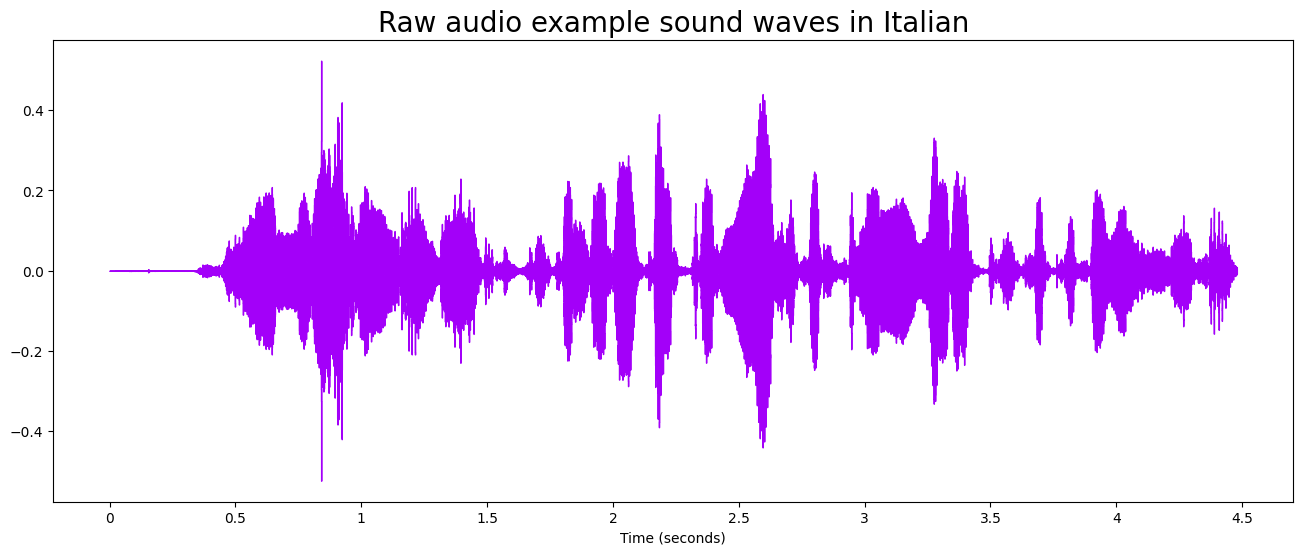

y shape: 143360
Sample Rate (KHz): 32000
Check Len of Audio: 4.48




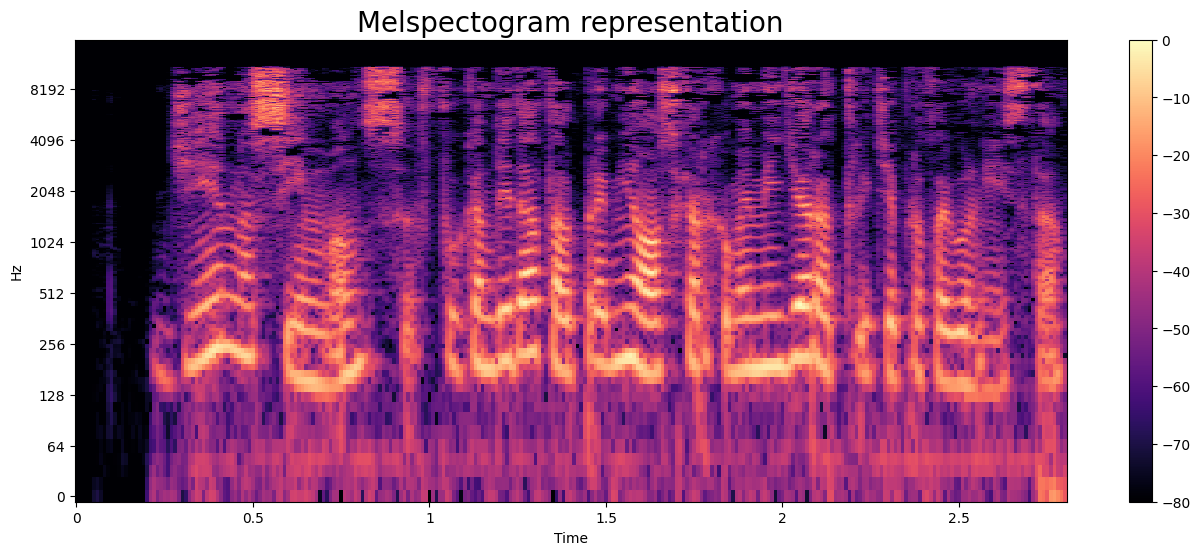

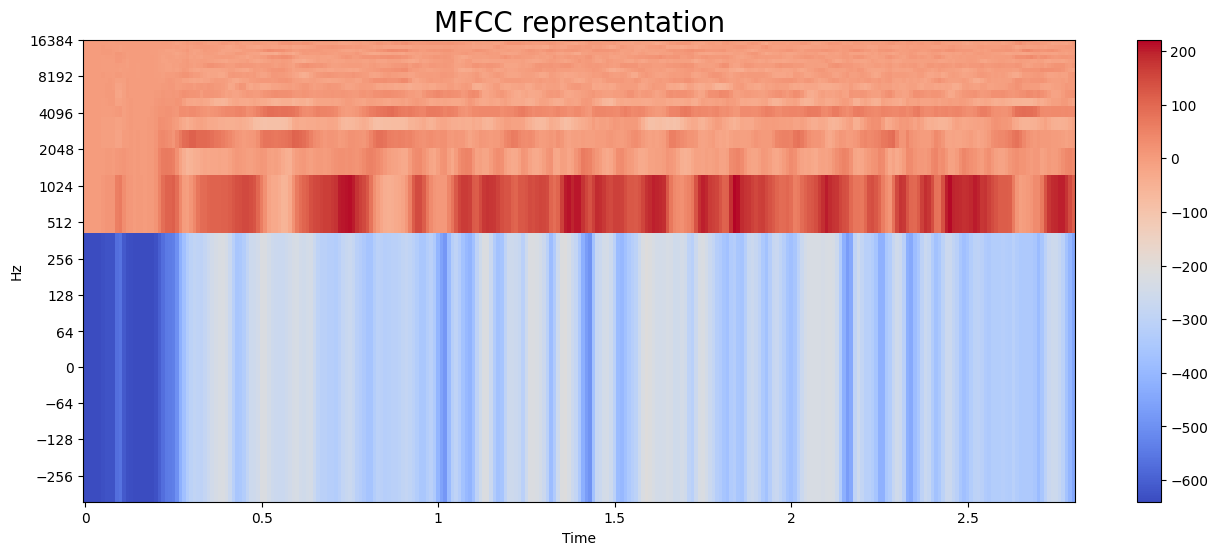

Playing a random file in the following language Spanish
common_voice_es_36646356.mp3
[ 0.00000000e+00 -5.92657477e-12 -1.44352065e-11 ... -2.38306844e-03
 -2.36331718e-03 -2.43723672e-03]
32000


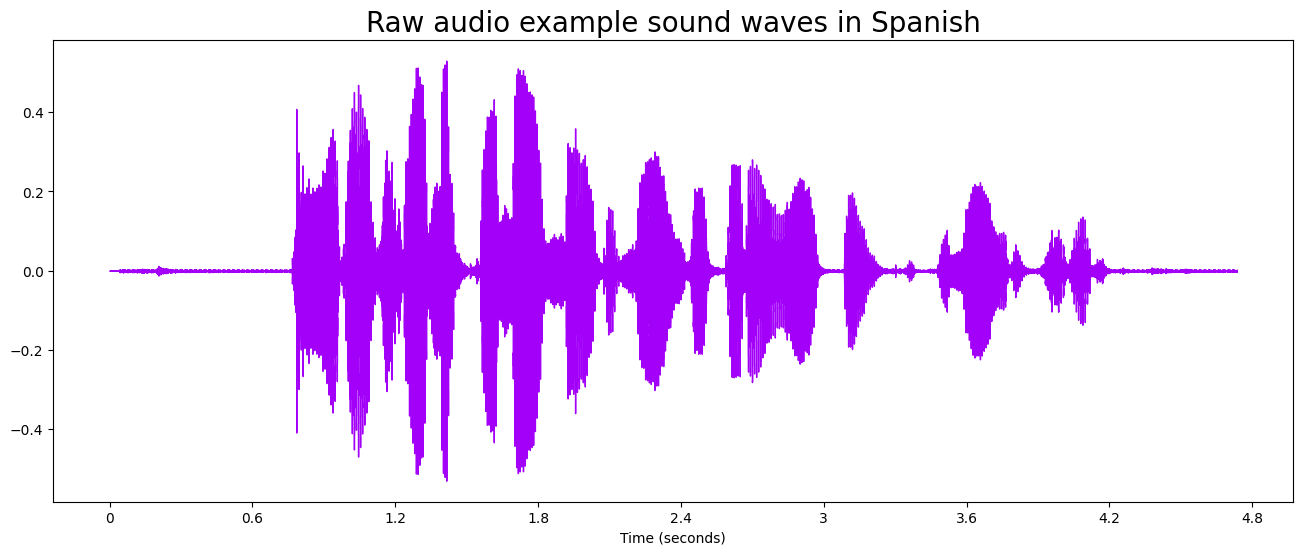

y shape: 151552
Sample Rate (KHz): 32000
Check Len of Audio: 4.736




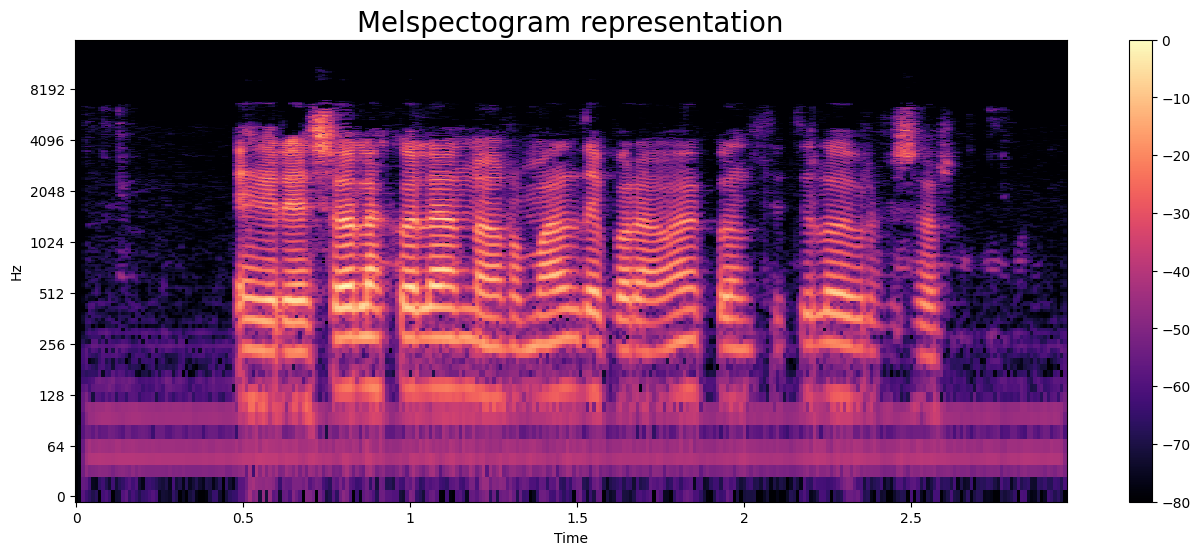

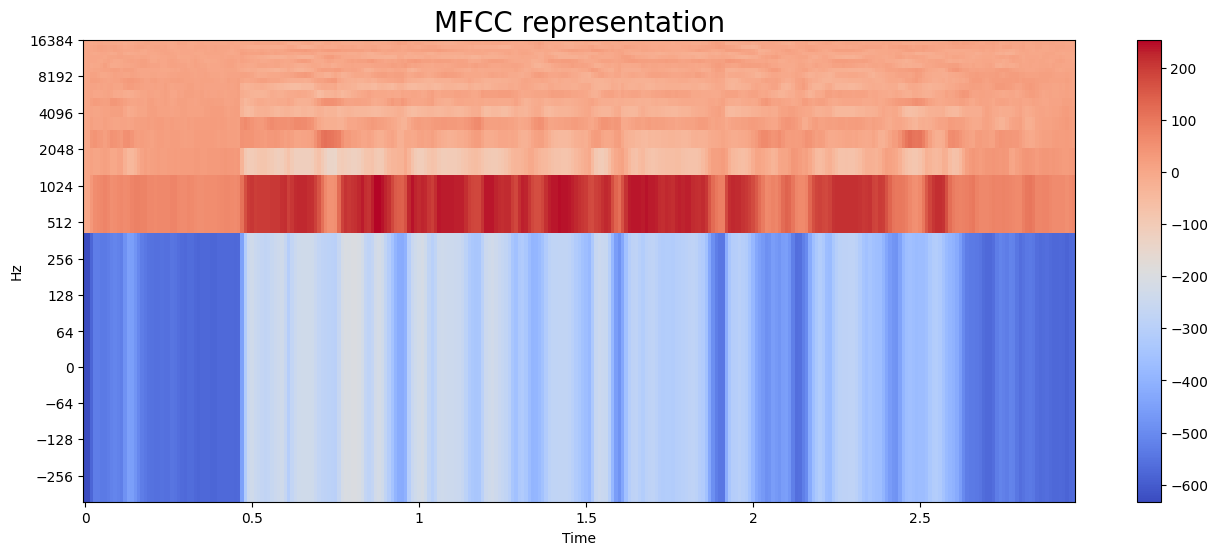

In [7]:
language_mp3_path = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject/languages"
sample_audio(language_mp3_path)

In [11]:
#Hours of audio per language
from glob import glob
import os
import librosa

language_mp3 = "/Users/Andee/Documents/CBS - Data Science/Second Semester/Machine Learning/Assignments/MLAssignments/FinalProject/languages"

language_list = os.listdir(language_mp3)
language_dic = {"it" : "Italian", "es" : "Spanish"}

for language in language_list:
    duration_sec = 0.0

    language_path = os.path.join(language_mp3, language)

    # Skip non-directory items
    if not os.path.isdir(language_path):
        continue

    if language in language_dic:
        language_name = language_dic[language]
    else:
        print("Unknown language!")
        language_name = language

    clips_path = os.path.join(language_path, "clips")

    all_files = glob(clips_path + '/*.mp3')

    for file in all_files:
        duration_sec += librosa.core.get_duration(path=file)

    duration_h = duration_sec / 60.0 / 60.0
    print('Total duration of ' + language_name + ' is ' + str(round(duration_h, 1)) + ' h')

Total duration of Italian is 12.3 h
Total duration of Spanish is 24.0 h


In [44]:
data = {"filename": [],"language": [], "tracks": [], "mfccs": [] }
language_list = os.listdir(language_mp3_path)
language_dic = {"it" : "Italian", "es" : "Spanish"}

# Compute MFCC
analysis_window_length = 0.01  # 10 ms in seconds

for language in language_list:
    language_path = os.path.join(language_mp3_path, language)

    # Skip non-directory items
    if not os.path.isdir(language_path):
        continue

    if language in language_dic:
        language_name = language_dic[language]
    else:
        print("Unknown language!")
        language_name = language

    clips_path = os.path.join(language_path, "clips")

    # Check if the clips directory exists
    if not os.path.isdir(clips_path):
        print(f"No 'clips' directory found in {language_path}")
        continue

    # get a list of all files in the folder
    mp3_list = os.listdir(clips_path)
    mp3_list = mp3_list[:100]
    # looping through all mp3s in one language
    for mp3 in mp3_list:
        # adding the filename as key
        data["filename"].append(mp3)
        # adding the label/language
        data["language"].append(language_name)
        # adding the clip
        audio_path = os.path.join(clips_path, mp3)
        data["tracks"].append(sf.read(audio_path))
        # calculate MFCC for the clip
        y, sr = sf.read(audio_path)
        hop_length = int(analysis_window_length * sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length)
        mfccs_scaled_features = np.mean(mfcc.T,axis=0)
        data["mfccs"].append(mfccs_scaled_features)

In [45]:
df = pd.DataFrame(data)
print(df.head())

#Save all array with the files, languages and tracks
#df.to_csv('array.csv')

                       filename language  \
0  common_voice_it_35120759.mp3  Italian   
1  common_voice_it_35392147.mp3  Italian   
2  common_voice_it_35163674.mp3  Italian   
3  common_voice_it_35270868.mp3  Italian   
4  common_voice_it_35219606.mp3  Italian   

                                              tracks  \
0  ([0.0, -9.25904426914148e-13, -2.3748717836030...   
1  ([0.0, 1.898078048900853e-12, 8.35194218472279...   
2  ([0.0, 9.291632133839878e-13, 1.31718366682548...   
3  ([0.0, 3.016666777488908e-13, -5.7271814244211...   
4  ([0.0, -1.1740968440532296e-12, 4.229657531336...   

                                               mfccs  
0  [-186.0010063597634, 127.53890050662575, -13.7...  
1  [-518.0898004481548, 86.59367556202906, 20.841...  
2  [-388.2180785376829, 117.69640806658884, 15.59...  
3  [-412.82102736650904, 70.91298620736787, 14.53...  
4  [-391.4149493630805, 76.72631644105353, 15.003...  


In [46]:
#Check-point to see if all data was correctly loaded
print(f'The number of files loaded is: {len(df["filename"])}, in {df["language"].nunique()} languages and {len(data["tracks"])} tracks ')

The number of files loaded is: 200, in 2 languages and 200 tracks 


In [47]:
X=np.array(df['mfccs'].tolist())
y=np.array(df['language'].tolist())

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [49]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    random_state=42,
                                                    train_size=0.8)

Model Creation

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
### No of classes
num_labels=y.shape[1]

In [64]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               2100      
                                                                 
 activation_16 (Activation)  (None, 100)               0         
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               20200     
                                                                 
 activation_17 (Activation)  (None, 200)               0         
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_18 (Dense)            (None, 100)              

In [66]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [67]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/5 [=====>........................] - ETA: 15s - loss: 24.2620 - accuracy: 0.7188
Epoch 1: val_loss improved from inf to 1.10297, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 5s 221ms/step - loss: 38.7864 - accuracy: 0.5125 - val_loss: 1.1030 - val_accuracy: 0.6500
Epoch 2/100
1/5 [=====>........................] - ETA: 0s - loss: 25.7047 - accuracy: 0.5938
Epoch 2: val_loss did not improve from 1.10297
5/5 [==============================] - 0s 36ms/step - loss: 36.4738 - accuracy: 0.4688 - val_loss: 6.7133 - val_accuracy: 0.5250
Epoch 3/100
1/5 [=====>........................] - ETA: 0s - loss: 35.0462 - accuracy: 0.4375
Epoch 3: val_loss did not improve from 1.10297
5/5 [==============================] - 0s 45ms/step - loss: 31.3227 - accuracy: 0.5125 - val_loss: 6.4100 - val_accuracy: 0.5250
Epoch 4/100
1/5 [=====>........................] - ETA: 0s - loss: 38.4229 - accuracy: 0.4375
Epoch 4: val_loss did not improve from

In [68]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7749999761581421
